# Training-validation-test split and cross-validation done right

Author: Jason Brownlee

Article from [machinelearningmastery](https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example of the model selection workflow using cross-validation

In [2]:
np.random.seed(42)

## Generate data and plot

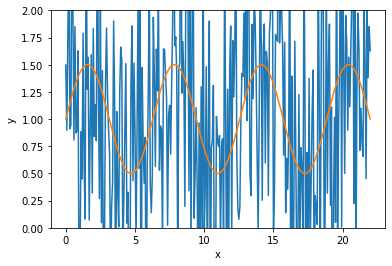

In [3]:
N = 300
x = np.linspace(0, 7*np.pi, N)
smooth = 1 + 0.5*np.sin(x)
y = smooth + np.random.randn(N)
plt.plot(x,y)
plt.plot(x,smooth)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,2)
plt.show()

## Train-test split, intentionally use shuffle=False

In [4]:
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

## Create two models: Polynomial and linear regression

In [5]:
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
linreg = LinearRegression()

## Cross-validation

In [6]:
scoring = 'neg_root_mean_squared_error'
polyscores = cross_validate(polyreg, X_train, y_train, scoring=scoring, return_estimator=True)
linscores = cross_validate(linreg, X_train, y_train, scoring=scoring, return_estimator=True)

## Which one is better? Linear and polynomial

In [7]:
print("Linear regression score:", linscores["test_score"].mean())
print("Polynomial regression score:", polyscores["test_score"].mean())
print("Difference:", linscores["test_score"].mean() - polyscores["test_score"].mean())

Linear regression score: -1.026780952674035
Polynomial regression score: -1.1329135412554654
Difference: 0.10613258858143038


## Let's show the coefficient of the last fitted polynomial regression, and show the coefficient of the last-fitted linear regression
This starts from the constant term and in ascending order of powers.

In [9]:
print("Coefficients of polynomial regression and linear regression:")
print(polyscores["estimator"][0].steps[1][1].coef_)
print(linscores["estimator"][0].intercept_, linscores["estimator"][-1].coef_)

Coefficients of polynomial regression and linear regression:
[-0.13273195  0.22669767 -0.00981567]
0.7975522151623449 [0.00855783]


## Plot and compare

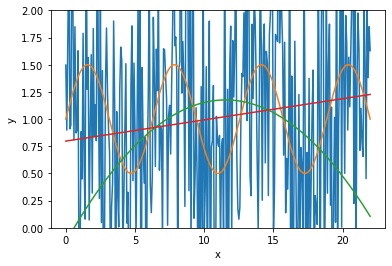

In [10]:
plt.plot(x, y)
plt.plot(x, smooth)
plt.plot(x, polyscores["estimator"][0].predict(X))
plt.plot(x, linscores["estimator"][0].predict(X))
plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Retrain the model and evaluate

In [11]:
import sklearn
linreg = sklearn.base.clone(linreg)
linreg.fit(X_train, y_train)
print("Test set RMSE:", mean_squared_error(y_test, linreg.predict(X_test), squared=False))
print("Mean validation RMSE:", -linscores["test_score"].mean())

Test set RMSE: 1.0681885249644059
Mean validation RMSE: 1.026780952674035
